In [1]:
import pandas as pd
import math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(style='darkgrid')

In [3]:
df = pd.read_csv('data/suicide_attacks.csv')

In [4]:
df.shape

(4616, 23)

In [5]:
df.head()

,groups,attacker.age,attacker.name,campaign.name,campaign.sides,date.day,date.month,date.year,statistics.# killed,statistics.# wounded,...,target.name,target.type,target.weapon,attacker.birth.location,attacker.birth.year,attacker.demographics.education,attacker.demographics.gender,attacker.demographics.marital,attacker.demographics.occupation,attacker.demographics.religion
0,"Lebanese National Resistance Front,Armed Strug...",15,Ahmad Qasiraka Haider,Hezbollah vs. Israel,"Hezbollah,Israel",11,11,1982,115,28,...,Israeli Defense Forces (IDF) headquarters,Security,Car bomb,Lebanon,1967,Primary,Male,Unknown,Unskilled,Secular
1,Unknown Group,-1,Unknown,Hezbollah vs. U.S. & France,"Hezbollah,U.S. & France",18,4,1983,60,120,...,U.S. Embassy in Lebanon,Political,Car bomb,Unknown,-1,Unknown,Unknown,Unknown,Unknown,Unknown
2,Lebanese Islamic Jihad (Hezbollah),24,Abu Sijanaka Abu Sijaan,Hezbollah vs. U.S. & France,"Hezbollah,U.S. & France",23,10,1983,58,88,...,Barracks for French Paratroopers,Security,Truck bomb,Unknown,1959,Unknown,Male,Unknown,Unknown,Unknown
3,Lebanese Islamic Jihad (Hezbollah),26,Abu Mazinaka Abu Mazen,Hezbollah vs. U.S. & France,"Hezbollah,U.S. & France",23,10,1983,230,88,...,US Marine Barracks,Security,Truck bomb,Unknown,1957,Unknown,Male,Unknown,Unknown,Unknown
4,Lebanese Islamic Jihad (Hezbollah),-1,Mohammad,Hezbollah vs. Israel,"Hezbollah,Israel",4,11,1983,60,10,...,Israeli Defense Forces (IDF) Headquarters,Security,Truck bomb,Unknown,-1,Unknown,Male,Unknown,Unknown,Unknown


In [6]:
df = df.rename(columns={'statistics.# killed': 'killed','statistics.# wounded':'wounded'})

## How many people got killed or injured per year?

In [7]:
xd = pd.DataFrame(df.groupby(['date.year']).killed.sum())
wd = pd.DataFrame(df.groupby(['date.year']).wounded.sum())

In [8]:
xd.reset_index(inplace=True)
wd.reset_index(inplace=True)

In [9]:
xd.head()

,date.year,killed
0,1982,115
1,1983,414
2,1984,29
3,1985,259
4,1986,33


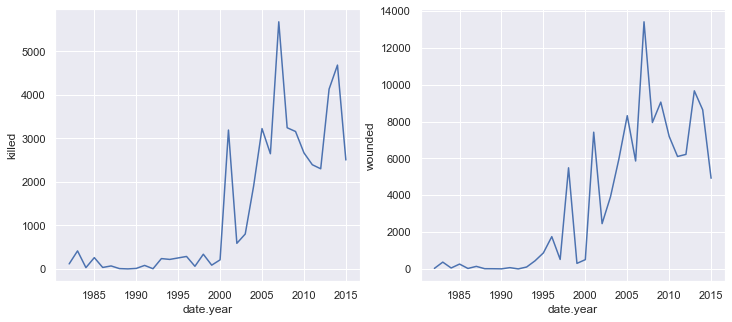

In [10]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
sns.lineplot(x='date.year',y='killed',data=xd,ax=ax1)
sns.lineplot(x='date.year',y='wounded',data=wd,ax=ax2)
plt.show()

In [11]:
df['nation.battered']=''
df['assailant.org']=''

In [12]:
for i in range(4578):
    if (len(df['campaign.name'][i].split('vs.')))==2:
        df['nation.battered'][i]=df['campaign.name'][i].split('vs.')[1]
    else:
        df['nation.battered'][i]=df['campaign.sides'][i]

<ipython-input-12-bde216fd1706>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nation.battered'][i]=df['campaign.name'][i].split('vs.')[1]
<ipython-input-12-bde216fd1706>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nation.battered'][i]=df['campaign.sides'][i]


In [13]:
for i in range(4578):
    df['assailant.org'][i]=df['campaign.sides'][i].split(',')[0]

<ipython-input-13-bc20bd725e2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['assailant.org'][i]=df['campaign.sides'][i].split(',')[0]


In [14]:
df.columns

Index(['groups', 'attacker.age', 'attacker.name', 'campaign.name',
       'campaign.sides', 'date.day', 'date.month', 'date.year', 'killed',
       'wounded', 'target.assassination?', 'target.country', 'target.location',
       'target.name', 'target.type', 'target.weapon',
       'attacker.birth.location', 'attacker.birth.year',
       'attacker.demographics.education', 'attacker.demographics.gender',
       'attacker.demographics.marital', 'attacker.demographics.occupation',
       'attacker.demographics.religion', 'nation.battered', 'assailant.org'],
      dtype='object')

In [15]:
df1 = df.drop(columns=['groups','attacker.name', 'campaign.name', 
       'attacker.birth.year','campaign.sides','target.assassination?',
       'attacker.demographics.education','target.location','attacker.birth.location','wounded',
       'attacker.demographics.marital', 'attacker.demographics.occupation','date.day','date.month','target.name','killed',
        ])

# About The Data

**assailant.org** --> Name of the Terrorist Organization that carried out the attack.<br>
**nation.battered** --> Name of the nation that was targeted.<br>
**target.country** --> Name of the country where the terrorist attack happened.<br>
**date.year**-->Date<br>
**target.type**-->Occupation/Profession of the main(targeted) victim.<br>
**attacker.demographics.gender**-->Gender of the assailant.<br>
**attacker.demographics.religion**--> Religious Faith of the aggressor.<br>
**target.weapon**--> Vehicle used to transport the weapon used to target the vitcims. 

In [16]:
df1.head()

,attacker.age,date.year,target.country,target.type,target.weapon,attacker.demographics.gender,attacker.demographics.religion,nation.battered,assailant.org
0,15,1982,Lebanon,Security,Car bomb,Male,Secular,Israel,Hezbollah
1,-1,1983,Lebanon,Political,Car bomb,Unknown,Unknown,U.S. & France,Hezbollah
2,24,1983,Lebanon,Security,Truck bomb,Male,Unknown,U.S. & France,Hezbollah
3,26,1983,Lebanon,Security,Truck bomb,Male,Unknown,U.S. & France,Hezbollah
4,-1,1983,Lebanon,Security,Truck bomb,Male,Unknown,Israel,Hezbollah


## Where did most of the attack take place?

In [17]:
df1['target.country'].value_counts().nlargest(5)

Iraq           1938
Afghanistan    1058
Pakistan        487
Syria           172
Sri Lanka       115
Name: target.country, dtype: int64

Most of the attacks happened in **Iraq** and **Afganistan**. 

In [18]:
df1.shape

(4616, 9)

In [19]:
df2 = df1[df1['attacker.age']!= -1]

## What is the average age of an assilant?

In [20]:
print('Average age -->', math.floor(df2['attacker.age'].mean()))
print('Median age -->', math.floor(df2['attacker.age'].median()))
print('Mode -->', math.floor(df2['attacker.age'].mode()))

Average age --> 23
Median age --> 22
Mode --> 20


In [21]:
df1.drop(columns=['attacker.age'],inplace=True)

In [22]:
df1 = df1.reset_index(drop=True)

In [23]:
df1.columns

Index(['date.year', 'target.country', 'target.type', 'target.weapon',
       'attacker.demographics.gender', 'attacker.demographics.religion',
       'nation.battered', 'assailant.org'],
      dtype='object')

In [24]:
df3 = df1

In [25]:
df3.shape

(4616, 8)

In [26]:
df3['attacker.demographics.religion'].value_counts()

Unknown           4293
Muslim (NA)        121
Hindu               89
Muslim (Sunni)      86
Secular             12
Muslim (Shia)       10
Muslim (Other)       4
Christian            1
Name: attacker.demographics.religion, dtype: int64

In [27]:
df3['attacker.demographics.religion'] = ['Muslim (NA)' if i=='Unknown' else i for i in df3['attacker.demographics.religion']]

In [28]:
df3.head()

,date.year,target.country,target.type,target.weapon,attacker.demographics.gender,attacker.demographics.religion,nation.battered,assailant.org
0,1982,Lebanon,Security,Car bomb,Male,Secular,Israel,Hezbollah
1,1983,Lebanon,Political,Car bomb,Unknown,Muslim (NA),U.S. & France,Hezbollah
2,1983,Lebanon,Security,Truck bomb,Male,Muslim (NA),U.S. & France,Hezbollah
3,1983,Lebanon,Security,Truck bomb,Male,Muslim (NA),U.S. & France,Hezbollah
4,1983,Lebanon,Security,Truck bomb,Male,Muslim (NA),Israel,Hezbollah


In [29]:
df3['attacker.demographics.gender'].value_counts()

Male       2256
Unknown    2185
Female      175
Name: attacker.demographics.gender, dtype: int64

## Test the following Hypothesis. 

In [30]:
print("Claim: 90% of suicide attacks are done by men.")
print("Conduct a survey to check if this claim is true. Take α = 0.05")
print("Check by considering a data of only male and female assailants.")

Claim: 90% of suicide attacks are done by men.
Conduct a survey to check if this claim is true. Take α = 0.05
Check by considering a data of only male and female assailants.


In [31]:
print("H0: p = .9")
print("Ha: p! = .0")
print("---> Two Tailed Test")

H0: p = .9
Ha: p! = .0
---> Two Tailed Test


In [32]:
df = df3[df3['attacker.demographics.gender']!='Unknown']
df.reset_index(drop=True,inplace=True)

In [33]:
df['attacker.demographics.gender'].value_counts()

Male      2256
Female     175
Name: attacker.demographics.gender, dtype: int64

In [34]:
import random 

In [35]:
value = random.choices(df['attacker.demographics.gender'], k=1000)

In [36]:
for i in range(1):
    print('Male',value.count('Male'))
    print('Female',value.count('Female'))

Male 922
Female 78


In [37]:
prob_male = value.count('Male')/(value.count('Male')+value.count('Female'))

In [38]:
prob_male 

0.922

By assuming that the null hypothesis is true, we calculate the standard deviation.

In [39]:
standard_dev = math.sqrt((0.90*0.10/1000))
standard_dev

0.009486832980505138

In [40]:
print("Assume-->Distribution of probability : p~N(0.90,0.009489)")

Assume-->Distribution of probability : p~N(0.90,0.009489)


In [41]:
z = (prob_male-0.9)/standard_dev 
z

2.3190036174568136

In [42]:
area = stats.norm.cdf(abs(z))

In [43]:
print('From standard normal probability distribution table we find the area for the given value of z is {}.'.format(area))

From standard normal probability distribution table we find the area for the given value of z is 0.9898025799083121.


In [44]:
total_p_value = (1-area)*2
#substracted from 1 because value gives an area for P(Z<z). But we want the remaining area. 
#multiplied by 2 because it is a two tailed test. 

In [45]:
total_p_value = round(total_p_value,4)
total_p_value
percent_p=total_p_value*100

In [46]:
print("Based on our survey, there is a {0:.2f} % chance that exactly 90% of attackers are male.".format(percent_p))

Based on our survey, there is a 2.04 % chance that exactly 90% of attackers are male.


In [47]:
if total_p_value > 0.05:
    print("Because total_p_value({0:.2f}) > α (0.05)".format(total_p_value))
    print("We accept the Null Hypothesis")
else:
    print("Because total_p_value({0:.2f}) < α (0.05)".format(total_p_value))
    print("We reject the Null Hypothesis")



Because total_p_value(0.02) < α (0.05)
We reject the Null Hypothesis


## Plot a bar graph to visualize the proportion of Male and Female assailants.

Text(0, 0.5, 'Number of attacks carried out')

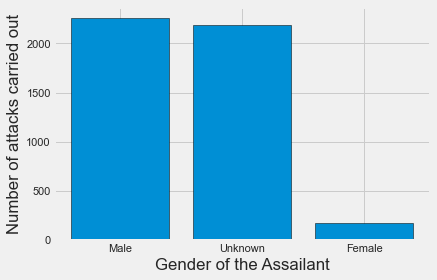

In [48]:
plt.style.use('fivethirtyeight')
count = df3['attacker.demographics.gender'].value_counts()
gender = df3['attacker.demographics.gender'].unique()
plt.bar(gender,count, edgecolor='black')
plt.xlabel("Gender of the Assailant")
plt.ylabel("Number of attacks carried out")

## Which year saw the most number of suicide attacks?

Text(0, 0.5, 'No. of attacks')

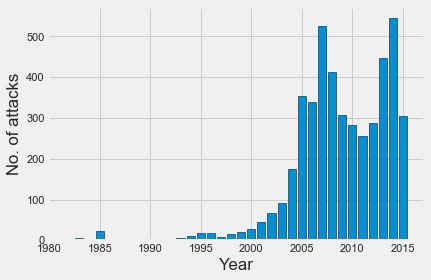

In [49]:
plt.style.use('fivethirtyeight')
count = df3['date.year'].value_counts()
year = df3['date.year'].value_counts().index
plt.bar(year,count, edgecolor='black')
plt.xlabel("Year")
plt.ylabel("No. of attacks")

In [50]:
df4 = df3[df3['assailant.org']!=""]

In [51]:
df4['assailant.org'].value_counts().sort_index()

Afghan Rebels                       1054
Al Qaeda                              45
Al-Qaida in Islamic North Africa      27
BKI                                    2
Chechen Separatists                   86
Egyptian Rebels                       14
Hezbollah                             44
Indonesian Rebels                      9
Iraqi Rebels                        1930
Isolated Attacks                      37
Jundullah                              6
Kashmiri Rebels                       11
LTTE                                 116
Libyan Rebels                         29
PKK                                   20
Pakistani Rebels                     478
Palestinian Resistance               173
Rebels                               393
Russian Separatists                    2
Somali Rebels                         90
Uzbek Rebels                           6
Xinjiang Rebels                        6
Name: assailant.org, dtype: int64

## Generate a pie chart to show which group is primarily targeted by the terrorists? 

In [52]:
df['target.type'].value_counts()

Security     1573
Civilian      514
Political     335
Unknown         9
Name: target.type, dtype: int64

In [53]:
df = df[df['target.type']!='Unknown']

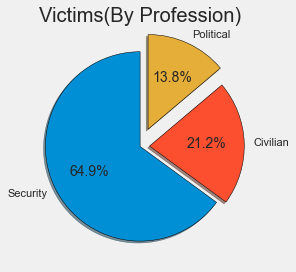

In [54]:
slices = df['target.type'].value_counts()
labels = df['target.type'].value_counts().index
explode = [0, 0.1, 0.2]
plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Victims(By Profession)")
plt.tight_layout()
plt.show()

In [55]:
assailant = (list(df4['assailant.org'].unique()))
assailant.sort()
counts = df4['assailant.org'].value_counts().sort_index()

In [56]:
count_nation = df4['nation.battered'].value_counts()
nation = df4['nation.battered'].value_counts().index

## Analyze the following graph.

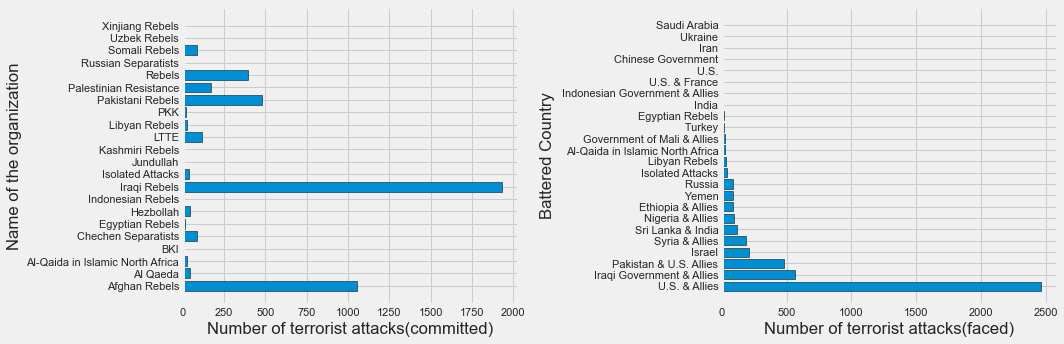

In [57]:
fig = plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.barh(assailant,counts,edgecolor='black')
plt.xlabel("Number of terrorist attacks(committed)")
plt.ylabel("Name of the organization")
plt.subplot(1, 2, 2)
plt.barh(nation,count_nation, edgecolor='black')
plt.xlabel("Number of terrorist attacks(faced)")
plt.ylabel("Battered Country")
plt.tight_layout()

The plots clearly shows that the US faced a lot more attack than all other nations combined. 

In [58]:
df4['target.weapon'].unique()

array(['Car bomb', 'Truck bomb', 'Belt bomb', 'Animal bomb',
       'Backpack bomb', 'Other PBIED', 'Boat bomb', 'Motorcycle bomb',
       'Scuba bomb', 'Cart bomb', 'Airplane', 'Mixed', 'Turban bomb',
       'Unspecified', 'Other', 'Unspecified PBIED'], dtype=object)

In [59]:
df4['target.weapon'].value_counts().index

Index(['Car bomb', 'Belt bomb', 'Truck bomb', 'Motorcycle bomb', 'Other PBIED',
       'Boat bomb', 'Unspecified', 'Mixed', 'Backpack bomb', 'Scuba bomb',
       'Cart bomb', 'Airplane', 'Animal bomb', 'Turban bomb', 'Other',
       'Unspecified PBIED'],
      dtype='object')

In [60]:
religion = df4['attacker.demographics.religion'].value_counts()
df5 = pd.DataFrame(religion)
df5.reset_index(inplace=True)

In [61]:
df5.head()

,index,attacker.demographics.religion
0,Muslim (NA),4376
1,Hindu,89
2,Muslim (Sunni),86
3,Secular,12
4,Muslim (Shia),10


In [62]:
df5 = df5.rename(columns={'index': 'religion','attacker.demographics.religion':'attack.count'})

In [63]:
df5.head()

,religion,attack.count
0,Muslim (NA),4376
1,Hindu,89
2,Muslim (Sunni),86
3,Secular,12
4,Muslim (Shia),10


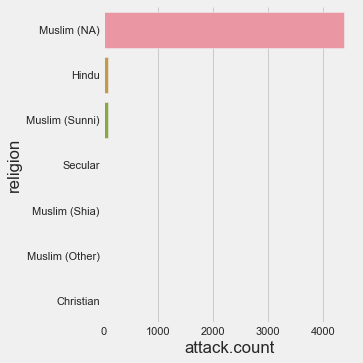

In [64]:
sns.catplot(x='attack.count',y='religion',kind='bar',data=df5)